In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df_train = pd.read_csv(r'C:\Users\Rishabh\Documents\IMS Proschool Data Science\Kaggle\train.csv')
df_test = pd.read_csv(r'C:\Users\Rishabh\Documents\IMS Proschool Data Science\Kaggle\test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df_train.shape, df_test.shape

((891, 12), (418, 11))

In [6]:
df_train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Baclini, Miss. Helene Barbara",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
# Combining both the train & test datasets
df_comb = pd.concat([df_train,df_test],axis=0,sort=False)

In [8]:
df_comb.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df_comb.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,1309.000000,891.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,655.000000,0.383838,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,378.020061,0.486592,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,328.000000,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,655.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,982.000000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


In [10]:
df_comb.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [11]:
df_comb.Age.isnull().sum()/len(df_comb)*100

20.091673032849503

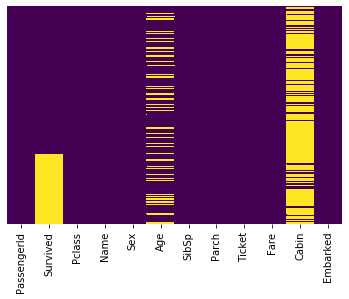

In [12]:
sb.heatmap(df_comb.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Roughly 20 percent of the data is missing from 'Age' column and we'll try to replace the NaN values with some form of imputation.  

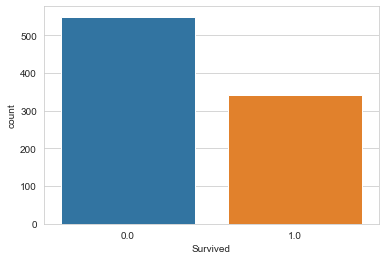

In [13]:
# Number of passengers who survived and who didn't
sb.set_style('whitegrid')
sb.countplot(x='Survived',data=df_comb)

0 -> People who didn't survived
,   1 ->.People who survived

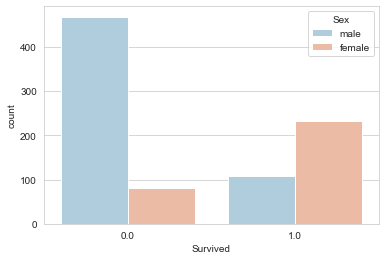

In [14]:
# Number of 'Males' & 'Females' survived and who didn't
sb.set_style('whitegrid')
sb.countplot(x='Survived',hue='Sex',data=df_comb,palette='RdBu_r')

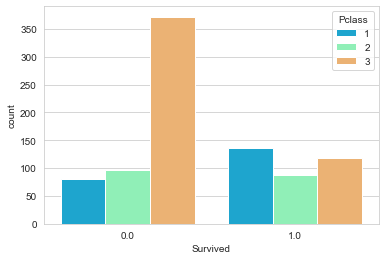

In [15]:
# Passengers who 'Survived' based on their 'Pclass' i.e tickets.
sb.set_style('whitegrid')
sb.countplot(x='Survived',hue='Pclass',data=df_comb,palette='rainbow')

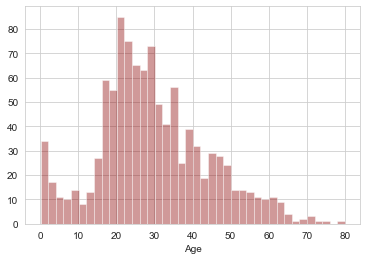

In [16]:
sb.distplot(df_comb['Age'].dropna(),kde=False,color='darkred',bins=40)

This above distribution plot of 'Age' shows us that majority of people that were on the ship were between the age of 18-30 years old.

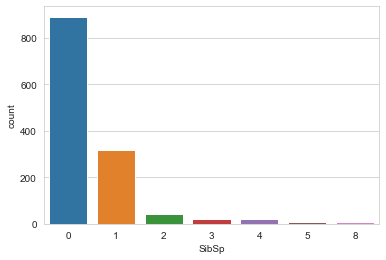

In [17]:
# Countplot of Siblings or Spouses
sb.set_style('whitegrid')
sb.countplot(x='SibSp',data=df_comb)

This shows that a major number of people did not have any sibling or spouse i.e 0

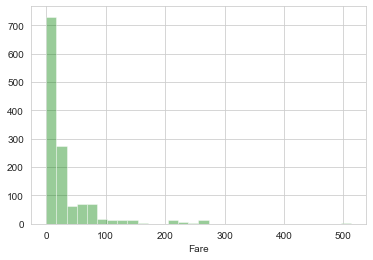

In [18]:
# 'Fare' distribution of passengers
sb.distplot(df_comb['Fare'],kde=False,color='green',bins=30)

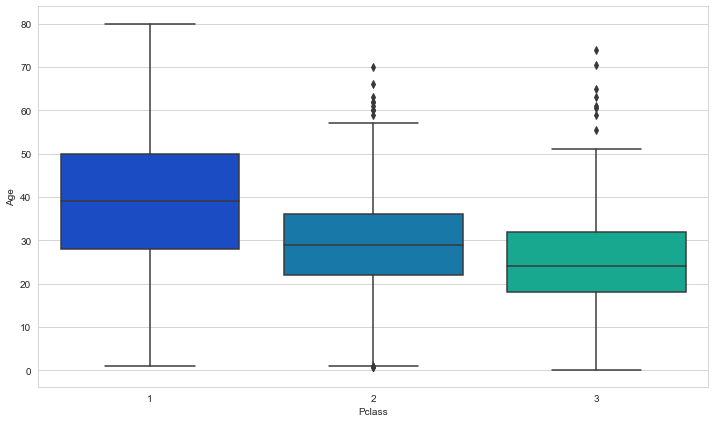

In [19]:
plt.figure(figsize=(12,7))
sb.boxplot(x='Pclass',y='Age',data=df_comb,palette='winter')

Checking the average 'Age' by passenger class 'Pclass'. Based on the above plot, we came to know that the wealthier passengers in the higher classes tends to be older, which makes sense. Now, we use these average values to fill up the null values in 'Age' column.

In [20]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 38
        
        elif Pclass==2:
            return 29
        
        else:
            return 24
        
    else:
        return Age

In [21]:
df_comb['Age']=df_comb[['Age','Pclass']].apply(impute_age,axis=1)

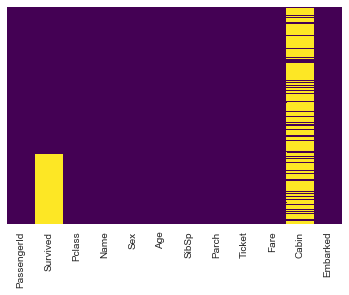

In [22]:
sb.heatmap(df_comb.isnull(),yticklabels=False,cbar=False,cmap='viridis')

We've filled up the NaN values in 'Age' column successfully. Now, in 'Cabin' column, there is too much of data missing and we cannot get any relevant information from this particular column. So, we'll be dropping it.

In [23]:
df_comb.drop('Cabin',axis=1,inplace=True)

In [24]:
df_comb.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


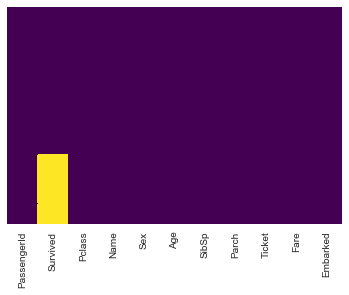

In [25]:
sb.heatmap(df_comb.isnull(),yticklabels=False,cbar=False,cmap='viridis')

The yellow colour in 'Survived' column is because of the concatenation of the test dataset below the train one.Now, it shows that we've successfully handled all the NaN values present in the dataset.

### Converting Categorical features

In [26]:
df_comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 162.7+ KB


In [27]:
pd.get_dummies(df_comb['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [28]:
Sex = pd.get_dummies(df_comb['Sex'],drop_first=True)
embark = pd.get_dummies(df_comb['Embarked'],drop_first=True) 

In [29]:
df_comb.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [30]:
df_comb.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,3,35.0,0,0,8.0500


In [31]:
df_comb = pd.concat([df_comb,Sex,embark],axis=1)

In [32]:
df_comb.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0.0,3,22.0,1,0,7.2500,1,0,1
1,2,1.0,1,38.0,1,0,71.2833,0,0,0
2,3,1.0,3,26.0,0,0,7.9250,0,0,1
3,4,1.0,1,35.0,1,0,53.1000,0,0,1
4,5,0.0,3,35.0,0,0,8.0500,1,0,1


In [33]:
df_train.shape,df_test.shape,df_comb.shape

((891, 12), (418, 11), (1309, 10))

In [34]:
df_valid = df_comb.iloc[:891,:]
df_test = df_comb.iloc[891:,:]

In [35]:
df_valid.shape,df_test.shape

((891, 10), (418, 10))

In [36]:
df_test.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,NaN,3,34.5,0,0,7.8292,1,1,0
1,893,NaN,3,47.0,1,0,7.0000,0,0,1
2,894,NaN,2,62.0,0,0,9.6875,1,1,0
3,895,NaN,3,27.0,0,0,8.6625,1,0,1
4,896,NaN,3,22.0,1,1,12.2875,0,0,1


In [37]:
df_test.drop('Survived',axis=1,inplace=True)

c:\users\rishabh\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [38]:
df_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [39]:
df_test.isna().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           1
male           0
Q              0
S              0
dtype: int64

In [40]:
df_test['Fare'].fillna(df_test['Fare'].mean(), inplace=True)

c:\users\rishabh\appdata\local\programs\python\python38\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [41]:
df_test.isna().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
male           0
Q              0
S              0
dtype: int64

In [42]:
# Store the feature matrix in 'X'
X = df_valid[['PassengerId','Pclass','Age','SibSp','Parch','Fare','male','Q','S']]
# Store response vector in 'y'
y = df_valid.Survived

In [43]:
X.shape, y.shape

((891, 9), (891,))

In [44]:
# Splitting 'X' & 'y' into training and testing sets.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

## Random Forest Classifier

In [45]:
# Import the model
from sklearn.ensemble import RandomForestClassifier

In [46]:
# Instantiate the model
rand= RandomForestClassifier(n_estimators=100,oob_score=True,random_state=42)

# Fit the model
rand.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [47]:
# Predict the model
y_pred = rand.predict(X_test)
y_pred

array([0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0.])

In [48]:
# Importing the classification metrics
from sklearn import metrics

In [49]:
print('ROC/AUC', metrics.roc_auc_score(y_test,y_pred))

ROC/AUC 0.8203924199228576


In [50]:
# Accuracy of the model
print(metrics.accuracy_score(y_test,y_pred))

0.8385650224215246


### Checking the feature importance in the dataset

In [51]:
rand.feature_importances_

array([0.19411339, 0.08507422, 0.17126083, 0.03996367, 0.02855983,
       0.19038712, 0.25838117, 0.01092844, 0.02133133])

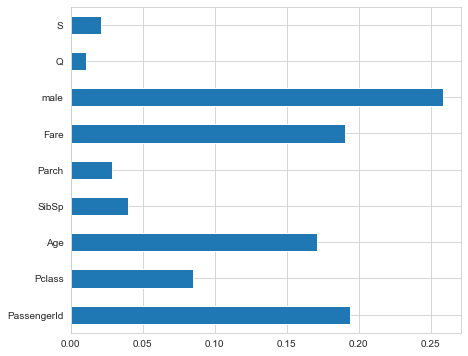

In [52]:
feature_importances = pd.Series(rand.feature_importances_, index=X.columns)
feature_importances.plot(kind='barh',figsize=(7,6))

By this above graph, we are able to see that which of the features or columns in the dataset are most important and which can be neglected to improve the performance of the model.

#### Parameter tuning of 'n_jobs' in the model

In [53]:
%%timeit
rand = RandomForestClassifier(n_estimators=100,oob_score=True,n_jobs=-1,random_state=42)
rand.fit(X_train,y_train)

464 ms ± 37 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [54]:
%%timeit
rand = RandomForestClassifier(n_estimators=100,oob_score=True,n_jobs=1,random_state=42)
rand.fit(X_train,y_train)

466 ms ± 25.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


By comparing the above two, we are gonna use 'n_jobs=-1' as it is taking slightly less computational time in the model.

### Feature Selection

As, the 'Embarked' feature in the dataset is showing the least importance in our model, so we can let it drop and continue without it.

In [55]:
# Define 'X' & 'y'
X = df_valid[['PassengerId','Pclass','Age','SibSp','Parch','Fare','male']]
y = df_valid.Survived

In [56]:
X.shape, y.shape

((891, 7), (891,))

In [57]:
# Splitting the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=5)

In [58]:
# Instantiate the model
rand= RandomForestClassifier(n_estimators=100,oob_score=True,max_depth=16,n_jobs=-1,max_features='auto',random_state=5)

# Fit the model
rand.fit(X_train,y_train)

# Predict the model
y_pred = rand.predict(X_test)

print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88       140
         1.0       0.83      0.72      0.77        83

    accuracy                           0.84       223
   macro avg       0.84      0.82      0.83       223
weighted avg       0.84      0.84      0.84       223



In [59]:
print(metrics.accuracy_score(y_test,y_pred))

0.8430493273542601


### Now, let us tune the model using RandomizedSearchCV for a better performance and accuracy

In [60]:
# Import the class
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [100,200,300,400,500,600]
max_features = ['auto', 'sqrt']
criterion = ['gini','entropy']
max_depth = [20,40,50,60,80]
min_samples_split = [2, 5, 10,15,20]
min_samples_leaf = [1, 2, 3, 4, 5]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'criterion': criterion,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

random_cv = RandomizedSearchCV(rand, param_distributions = random_grid, n_iter = 50,
                               scoring = 'accuracy',cv = 5,verbose=5,
                               random_state=42, n_jobs = -1,return_train_score = True)

random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:   55.0s
[Parallel(n_jobs=-1)]: Done 242 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.9min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=16,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                 

In [61]:
# Instantiate the model with best of Random search parameters
rf_random_search = RandomForestClassifier(n_estimators=100,min_samples_split=5,min_samples_leaf=9,
                                          max_features=1,max_depth=10,criterion='entropy',n_jobs=-1,
                                          bootstrap=True,random_state=5)
                       
# Fit the model using the updated training sets with best of Random search
rf_random_search.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features=1,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

In [62]:
#Predict the response for test dataset with best of Random search
y_pred_new = rf_random_search.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_new))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred_new))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred_new))
# F1-Score
print('F1-Score',metrics.f1_score(y_test,y_pred_new))
# Confusion Matrix
print('Confusion Matrix',metrics.confusion_matrix(y_test,y_pred_new))

Accuracy: 0.8565022421524664
Precision: 0.8923076923076924
Recall: 0.6987951807228916
F1-Score 0.7837837837837838
Confusion Matrix [[133   7]
 [ 25  58]]


In [63]:
X = df_valid.drop('Survived', axis=1)
y = df_valid['Survived']
random_cv.fit(X,y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done 194 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.9min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=16,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                 

In [64]:
random_cv.best_params_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_features': 'auto',
 'max_depth': 60,
 'criterion': 'gini',
 'bootstrap': True}

In [65]:
# Instantiate the model with best of Random search parameters
rf_whole = RandomForestClassifier(n_estimators=50,min_samples_split=2,min_samples_leaf=10,
                                          max_features='auto',max_depth=50,criterion='gini',n_jobs=-1,
                                          bootstrap=True,random_state=42)
                       
# Fit the model using the updated training sets with best of Random search
rf_whole.fit(X,y)
y_final = rf_whole.predict(df_test)

## XgBoost Classifier 

In [67]:
# Import the model
from xgboost import XGBClassifier

In [73]:
# Instantiate the model
xgb_model = XGBClassifier()
# Fit the model
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [74]:
X_train.shape,y_train.shape

((668, 7), (668,))

In [75]:
# Predict the model
y_pred_xgb_1 = xgb_model.predict(X_test)
# Checking the accurcy of the model
print(metrics.accuracy_score(y_test,y_pred_xgb_1))

0.8071748878923767


#### Tune the model

In [76]:

n_estimators = [100,200,300,400,500,600]
max_features = ['auto', 'sqrt']
criterion = ['gini','entropy']
max_depth = [20,40,50,60,80]
min_samples_split = [2, 5, 10,15,20]
min_samples_leaf = [1, 2, 3, 4, 5]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'criterion': criterion,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

random_cv = RandomizedSearchCV(xgb_model, param_distributions = random_grid, n_iter = 50,
                               scoring = 'accuracy',cv = 5,verbose=5,
                               random_state=5, n_jobs = -1,return_train_score = True)

random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   54.1s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster=None,
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n...
                   iid='deprecated', n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion':

In [77]:
random_cv.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 60,
 'criterion': 'entropy',
 'bootstrap': False}

In [131]:
# Instantiate the model with best of Random search parameters
xgb_random_search = XGBClassifier(n_estimators=800,min_samples_split=7,min_samples_leaf=15,
                                          max_features='auto',max_depth=20,criterion='gini',n_jobs=-1,
                                          bootstrap=True,random_state=5)
                       
# Fit the model using the updated training sets with best of Random search
xgb_random_search.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, bootstrap=True, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='gini', gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=20,
              max_features='auto', min_child_weight=1, min_samples_leaf=15,
              min_samples_split=7, missing=nan, monotone_constraints=None,
              n_estimators=800, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=5, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None, ...)

In [132]:
#Predict the response for test dataset with best of Random search
y_pred_xgb_2 = xgb_random_search.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_xgb_2))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred_xgb_2))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred_xgb_2))
# F1-Score
print('F1-Score',metrics.f1_score(y_test,y_pred_xgb_2))
# Confusion Matrix
print('Confusion Matrix',metrics.confusion_matrix(y_test,y_pred_xgb_2))

Accuracy: 0.8161434977578476
Precision: 0.8
Recall: 0.6746987951807228
F1-Score 0.7320261437908497
Confusion Matrix [[126  14]
 [ 27  56]]


In [80]:
X = df_valid.drop('Survived', axis=1)
y = df_valid['Survived']
random_cv.fit(X,y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   52.7s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster=None,
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n...
                   iid='deprecated', n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion':

In [81]:
random_cv.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 80,
 'criterion': 'entropy',
 'bootstrap': True}

In [137]:
# Instantiate the model with best of Random search parameters
xgb_whole = XGBClassifier(n_estimators=200,min_samples_split=7,min_samples_leaf=16,
                                          max_features=1,max_depth=20,criterion='entropy',n_jobs=-1,
                                          bootstrap=True,random_state=5,learning_rate=0.01)
                       
# Fit the model using the updated training sets with best of Random search
xgb_whole.fit(X,y)
y_final_xgb = xgb_whole.predict(df_test)

In [138]:
Final_df=pd.DataFrame()
Final_df['PassengerID']=df_test['PassengerId']
Final_df['Survived']=y_final_xgb
Final_df.to_csv(r'C:\Users\Rishabh\Documents\IMS Proschool Data Science\Kaggle\gender_submission.csv',index=False)